# Boston House Pricing Prediction using Machine Learning

Dibuat oleh: Anthony Kevin Oktavius

Library Import

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import klib

**Deskripsi Dataset:**

Ada 14 variabel yang terdapat pada dataset ini, yaitu sebagai berikut.

* **Crim**: per kapita rata kriminal dari kota yang disebut.
* **Zn**: proporsi lahan residensial yang ditempati untuk lebih dari 25 ribu kaki kuadrat.
* **Indus**: proporsi hektar bisnis non-ritel per kota.
* **Chas**: 1 jika saluran membatasi sungai. 0 jika saluran tidak membatasi sungai.
* **Nox**: konsentrasi oxida nitrit (per 10 juta).
* **Rm**: rata-rata jumlah ruangan per rumah tempat tinggal.
* **Age**: proporsi unit yang telah ditempati pemilik sejak 1940.
* **Dis**: jarak ke lima tempat rekruitmen di boston.
* **Rad**: indeks aksesibilitas ke jalan lingkar.
* **Tax**: pajak properti nilai penuh per 10 000 dolar.
* **Ptratio**: rasio antara siswa dan guru pada suatu kota.
* **b**: B - 1000 (BK - 0.63)^2, dimana Bk adalah proporsi orang kulit hitam di suatu kota.
* **lstat**: persentase jumlah penurunan populasi.
* **medv**: nilai harga median dari rumah yang ditempati pemilik, dalam nilai ribuan dolar.

Deskripsi dataset diambil di: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html.

Dataset Preparation

In [57]:
housing_df = pd.read_csv("boston_housing.csv")
housing_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


Melihat informasi masing-masing field

In [58]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Melihat data statistikal pada masing-masing field numerik.

In [59]:
housing_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Menbuat variabel pada masing-masing list field, agar lebih mudah untuk melakukan manajemen tiap field.

In [60]:
criminal_field = "crim"
zoned_field = "zn"
industrial_field = "indus"
charles_river_field = "chas"
nitric_oxide_field = "nox"
room_field = "rm"
age_field = "age"
distance_field = "dis"
radial_field = "rad"
tax_field = "tax"
pupil_teacher_ratio_field = "ptratio"
b_field = "b"
lower_stat_field = "lstat"
median_value_field = "medv"

Melihat data-data yang unik pada masing-masing field

In [61]:
housing_df.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
b          357
lstat      455
medv       229
dtype: int64

In [62]:
limit_show_unique = 20

fields = [criminal_field, zoned_field, industrial_field, charles_river_field,
          nitric_oxide_field, room_field, age_field, distance_field,
          radial_field, tax_field, pupil_teacher_ratio_field, b_field,
          lower_stat_field, median_value_field]

for index, field in enumerate(fields):
    print(f"{field}:")
    print(housing_df[field].unique()[:8])

crim:
[0.00632 0.02731 0.02729 0.03237 0.06905 0.02985 0.08829 0.14455]
zn:
[ 18.    0.   12.5  75.   21.   90.   85.  100. ]
indus:
[2.31 7.07 2.18 7.87 8.14 5.96 2.95 6.91]
chas:
[0 1]
nox:
[0.538 0.469 0.458 0.524 0.499 0.428 0.448 0.439]
rm:
[6.575 6.421 7.185 6.998 7.147 6.43  6.012 6.172]
age:
[65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1]
dis:
[4.09   4.9671 6.0622 5.5605 5.9505 6.0821 6.5921 6.3467]
rad:
[1 2 3 5 4 8 6 7]
tax:
[296 242 222 311 307 279 252 233]
ptratio:
[15.3 17.8 18.7 15.2 21.  19.2 18.3 17.9]
b:
[396.9  392.83 394.63 394.12 395.6  386.63 386.71 392.52]
lstat:
[ 4.98  9.14  4.03  2.94  5.33  5.21 12.43 19.15]
medv:
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1]


Melakukan list variabel kategorikal dan numerikal.

In [63]:
numerical_features = [criminal_field, zoned_field, industrial_field, nitric_oxide_field,
                        room_field, age_field, distance_field, tax_field,
                        pupil_teacher_ratio_field, b_field, lower_stat_field, median_value_field]
categorical_features = [charles_river_field, radial_field]

print(len(numerical_features))
print(len(categorical_features))

12
2


## Data Visualization

Define Common Functions

In [64]:
def get_plot_figure(width, height):
    figure = plt.figure()
    figure.set_figwidth(width)
    figure.set_figheight(height)
    return figure

### Categorical Features

#### Single Variable

##### Categorical Features 

Pie Chart - Composition

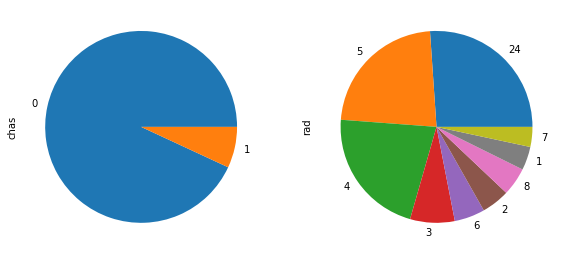

In [65]:
figure = get_plot_figure(15, 15)

for index, categorical_field in enumerate(categorical_features):
    plt.subplot(3, 3, index + 1)

    labels = housing_df[categorical_field]
    data = housing_df[categorical_field].value_counts().plot(kind='pie')

plt.show()

**Bar Plot - Comparison**

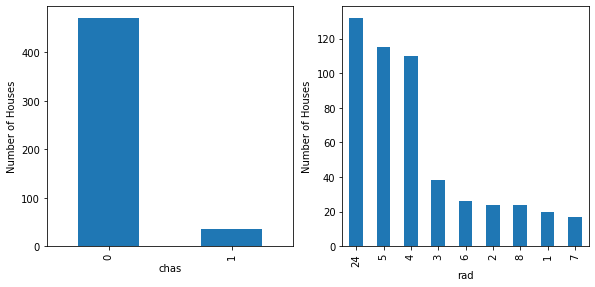

In [66]:
figure = get_plot_figure(15, 15)

for index, categorical_field in enumerate(categorical_features):
    plt.subplot(3, 3, index + 1)
    plt.xlabel(categorical_field)
    plt.ylabel("Number of Houses")
    housing_df[categorical_field].value_counts().plot(kind='bar')
    
plt.show()

##### Numerical Features

Distribution Plot - Distribution

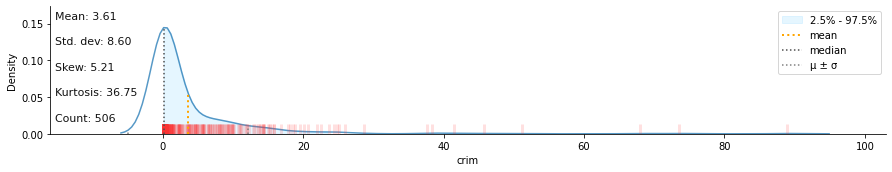

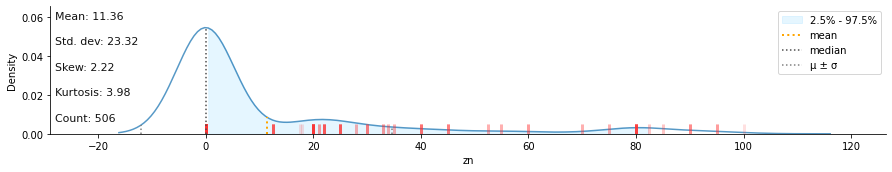

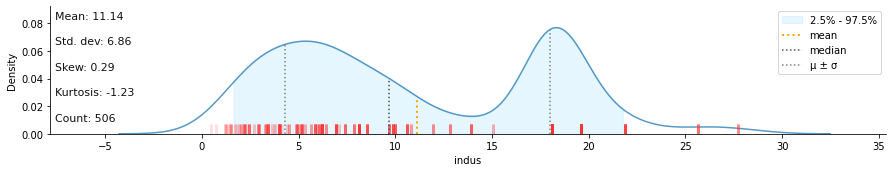

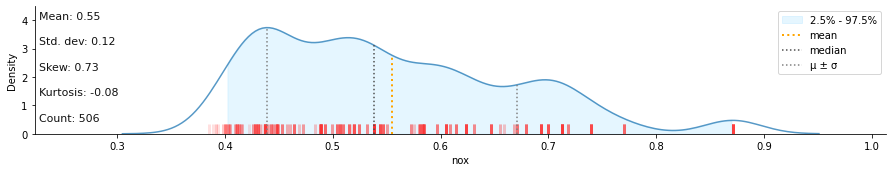

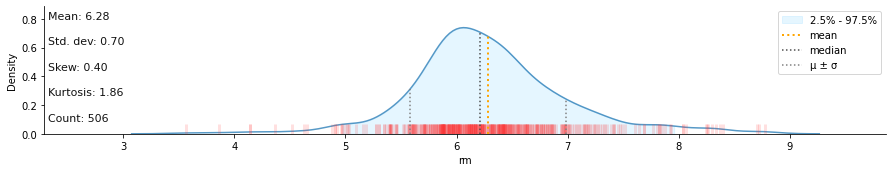

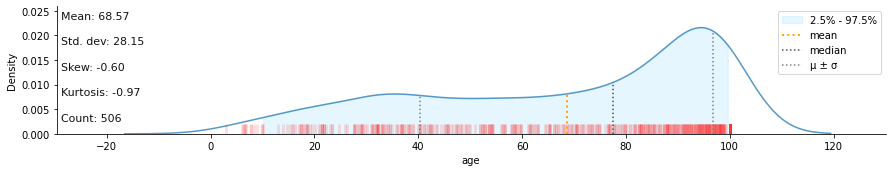

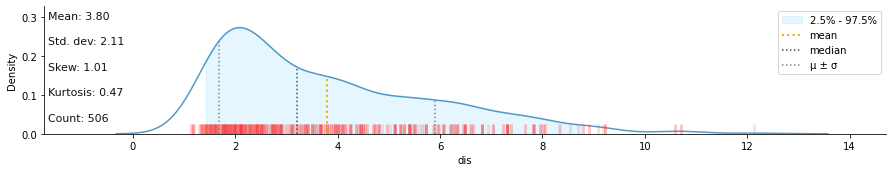

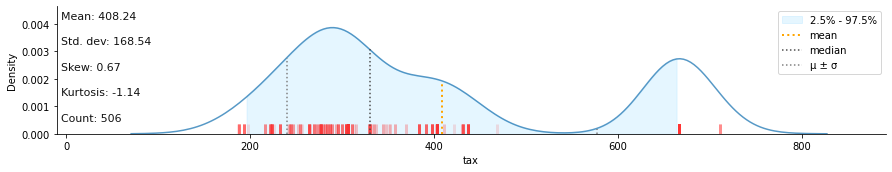

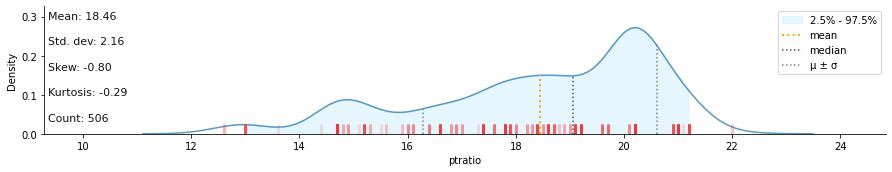

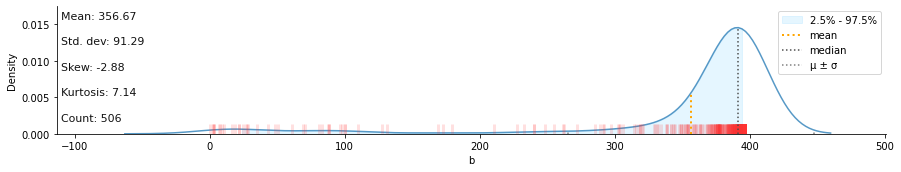

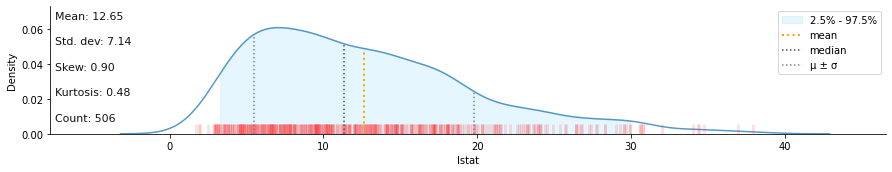

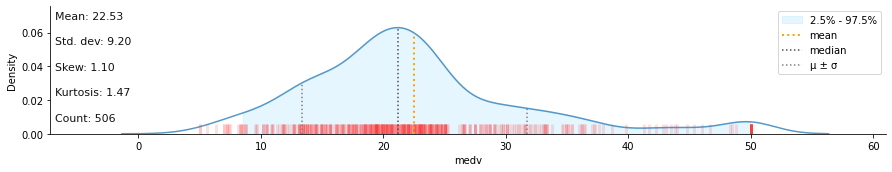

In [67]:
klib.dist_plot(housing_df[numerical_features])
plt.show()

Box Plot - Distribution & Comparison

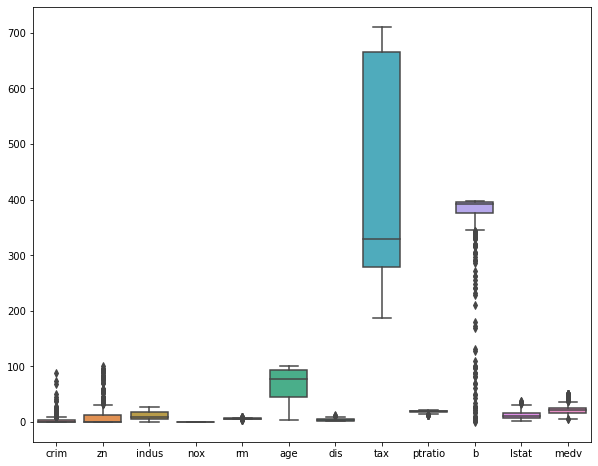

In [68]:
figure = get_plot_figure(10, 8)

sns.boxplot(data = housing_df[numerical_features])
plt.show()

#### Two Variables

##### Categorical Features

Multiple Bar Charts - Comparison

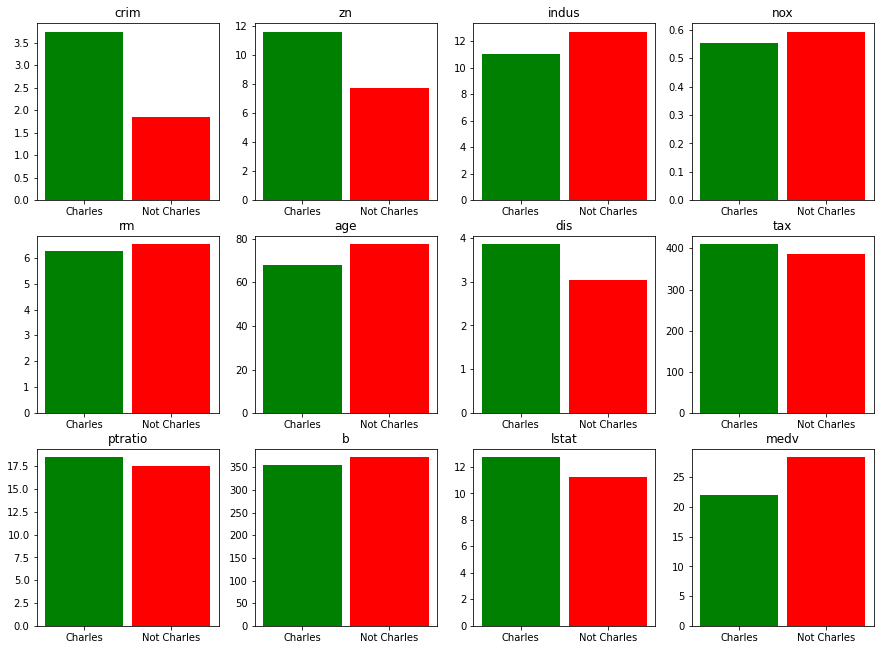

In [69]:
stacked_bar_chart_width = 0.9
no_charles_river_color = 'red'
charles_river_color = 'green'

figure = plt.figure()
figure.set_figwidth(15)
figure.set_figheight(15)


stacked_bar_fields = numerical_features.copy()
stacked_bar_fields.append(charles_river_field)

for index, field in enumerate(stacked_bar_fields):
    
    if field == charles_river_field:
        continue

    plt.subplot(4, 4, index + 1)

    total_is_not_charles = housing_df[housing_df[charles_river_field] == 0].groupby(charles_river_field)[field].mean()
    total_is_charles = housing_df[housing_df[charles_river_field] == 1].groupby(charles_river_field)[field].mean()

    unique_is_not_charles = list(total_is_not_charles.index)[:6]
    unique_is_charles = list(total_is_charles.index)[:6]

    plt.title(field)

    plt.xticks([0, 1], ['Charles', 'Not Charles'])

    plt.bar(unique_is_charles, total_is_charles, color = no_charles_river_color, width=stacked_bar_chart_width)
    plt.bar(unique_is_not_charles, total_is_not_charles, color = charles_river_color, width=stacked_bar_chart_width)

plt.show()

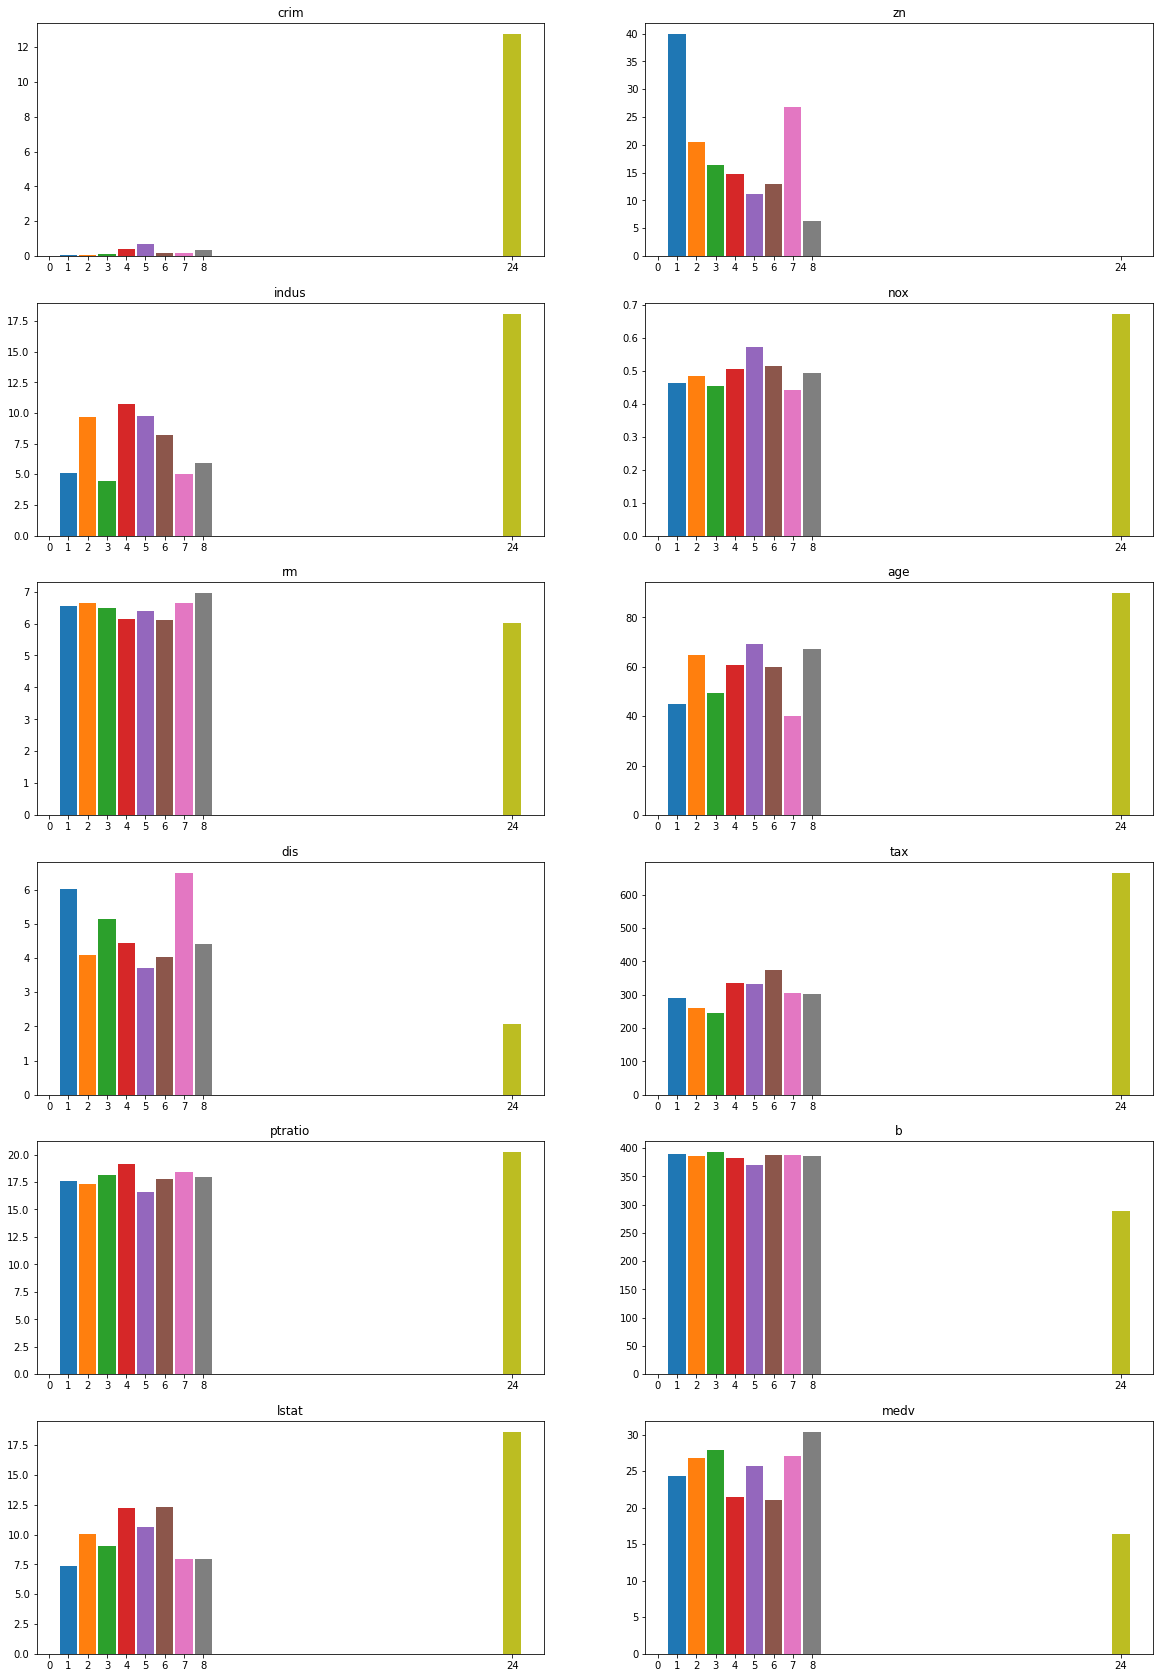

In [70]:
stacked_bar_chart_width = 0.9

figure = get_plot_figure(20, 30)

stacked_bar_fields = numerical_features.copy()
stacked_bar_fields.append(radial_field)

for index, field in enumerate(stacked_bar_fields):
    
    if field == radial_field:
        continue

    plt.subplot(6, 2, index + 1)

    total_radial_1 = housing_df[housing_df[radial_field] == 1].groupby(radial_field)[field].mean()
    total_radial_2 = housing_df[housing_df[radial_field] == 2].groupby(radial_field)[field].mean()
    total_radial_3 = housing_df[housing_df[radial_field] == 3].groupby(radial_field)[field].mean()
    total_radial_4 = housing_df[housing_df[radial_field] == 4].groupby(radial_field)[field].mean()
    total_radial_5 = housing_df[housing_df[radial_field] == 5].groupby(radial_field)[field].mean()
    total_radial_6 = housing_df[housing_df[radial_field] == 6].groupby(radial_field)[field].mean()
    total_radial_7 = housing_df[housing_df[radial_field] == 7].groupby(radial_field)[field].mean()
    total_radial_8 = housing_df[housing_df[radial_field] == 8].groupby(radial_field)[field].mean()
    total_radial_24 = housing_df[housing_df[radial_field] == 24].groupby(radial_field)[field].mean()

    unique_total_radial_1 = list(total_radial_1.index)[:8]
    unique_total_radial_2 = list(total_radial_2.index)[:8]
    unique_total_radial_3 = list(total_radial_3.index)[:8]
    unique_total_radial_4 = list(total_radial_4.index)[:8]
    unique_total_radial_5 = list(total_radial_5.index)[:8]
    unique_total_radial_6 = list(total_radial_6.index)[:8]
    unique_total_radial_7 = list(total_radial_7.index)[:8]
    unique_total_radial_8 = list(total_radial_8.index)[:8]
    unique_total_radial_24 = list(total_radial_24.index)[:8]

    plt.title(field)

    plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 24])

    plt.bar(unique_total_radial_1, total_radial_1, width=stacked_bar_chart_width)
    plt.bar(unique_total_radial_2, total_radial_2, width=stacked_bar_chart_width)
    plt.bar(unique_total_radial_3, total_radial_3, width=stacked_bar_chart_width)
    plt.bar(unique_total_radial_4, total_radial_4, width=stacked_bar_chart_width)
    plt.bar(unique_total_radial_5, total_radial_5, width=stacked_bar_chart_width)
    plt.bar(unique_total_radial_6, total_radial_6, width=stacked_bar_chart_width)
    plt.bar(unique_total_radial_7, total_radial_7, width=stacked_bar_chart_width)
    plt.bar(unique_total_radial_8, total_radial_8, width=stacked_bar_chart_width)
    plt.bar(unique_total_radial_24, total_radial_24, width=stacked_bar_chart_width)

plt.show()

##### Numerical Variables

Distribution Plot - Comparison & Distribution

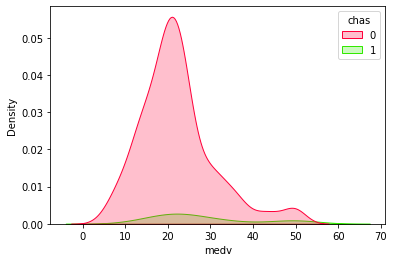

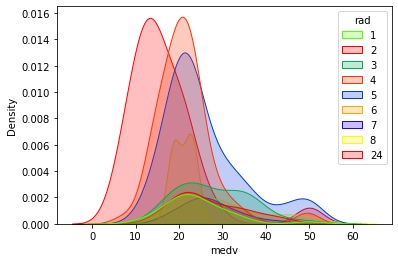

In [71]:
for index, categorical_field in enumerate(categorical_features):
    sns.kdeplot(x = housing_df[median_value_field], hue = housing_df[categorical_field], palette = 'prism_r', shade = True)
    plt.show()

Scatter Plot - Relationship & Distribution

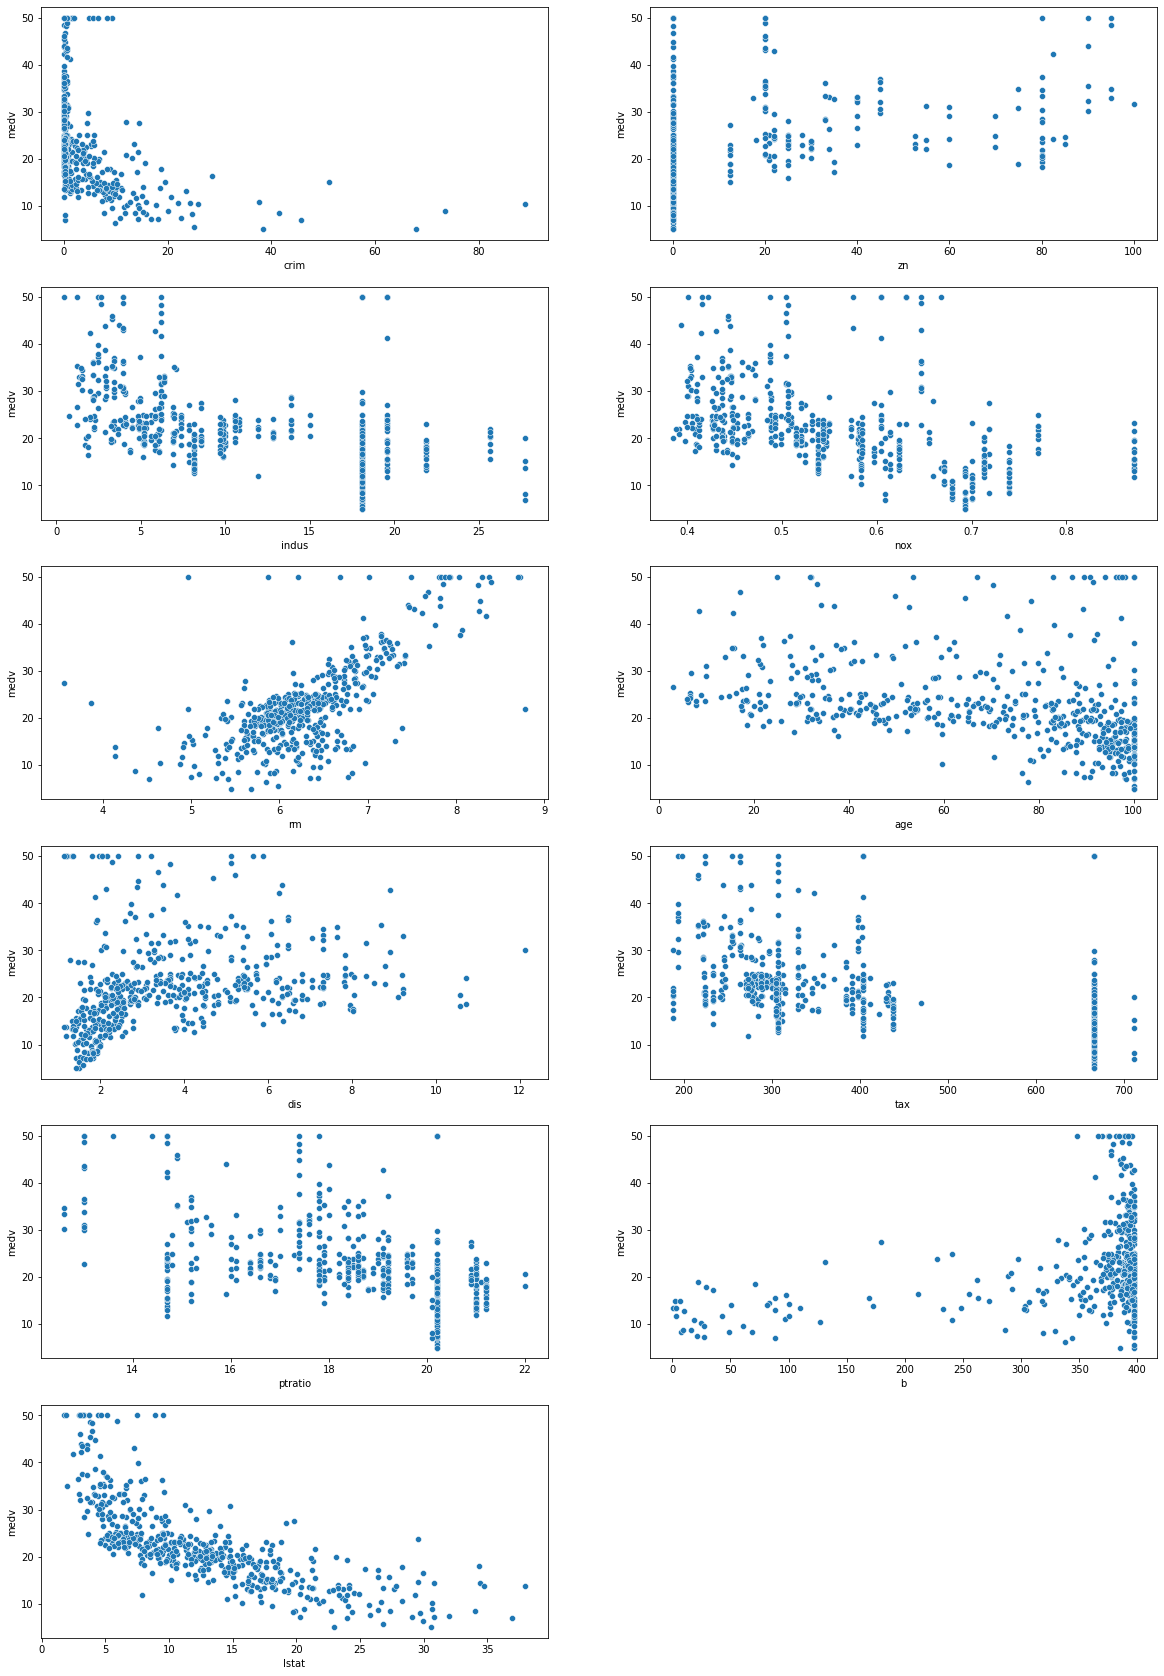

In [72]:
figure = get_plot_figure(20, 30)

for index, numerical_field in enumerate(numerical_features):
    if numerical_field == median_value_field:
        continue

    plt.subplot(6, 2, index + 1)
    
    sns.scatterplot(x = housing_df[numerical_field], y = housing_df[median_value_field])

### Multiple Variables

#### Numerical Variables

Pairplot - Relationship, Distribution, Comparison

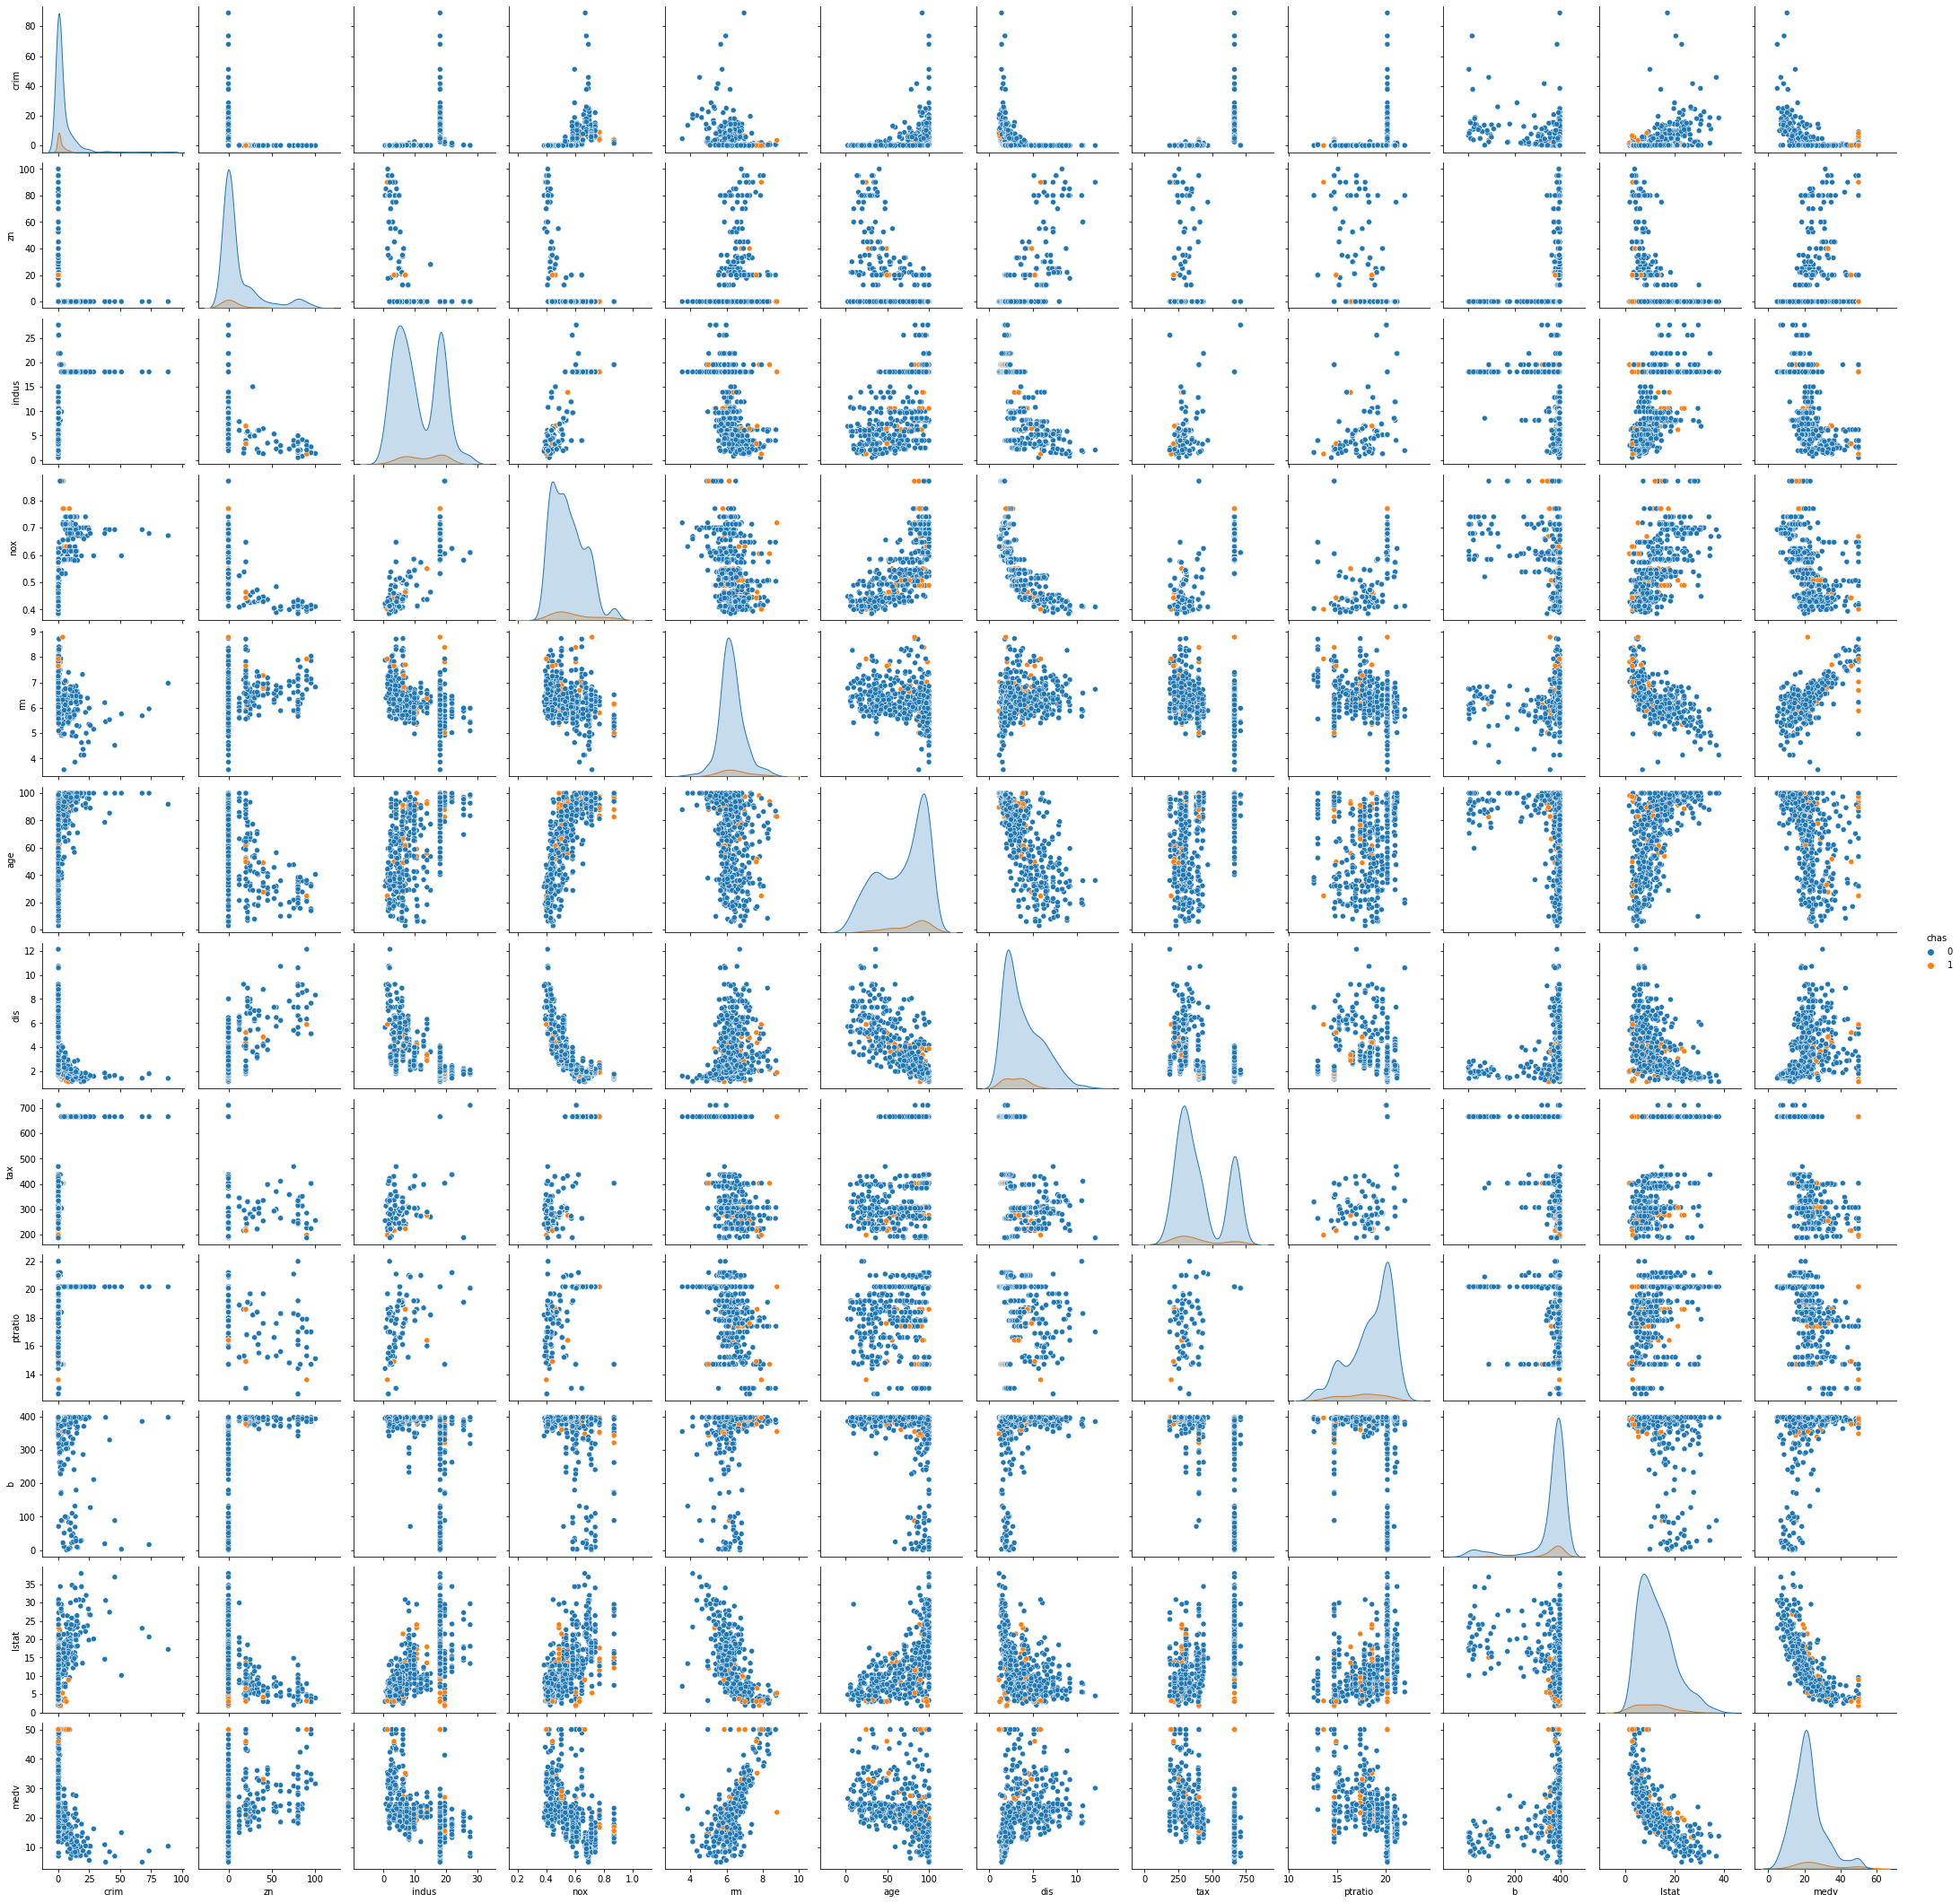

In [73]:
pairplot_fields = numerical_features.copy()
pairplot_fields.append(charles_river_field)

sns.pairplot(data = housing_df[pairplot_fields], hue = charles_river_field)

Heatmap - Correlation/ Relationship - Feature Selection

<Figure size 1080x1080 with 0 Axes>

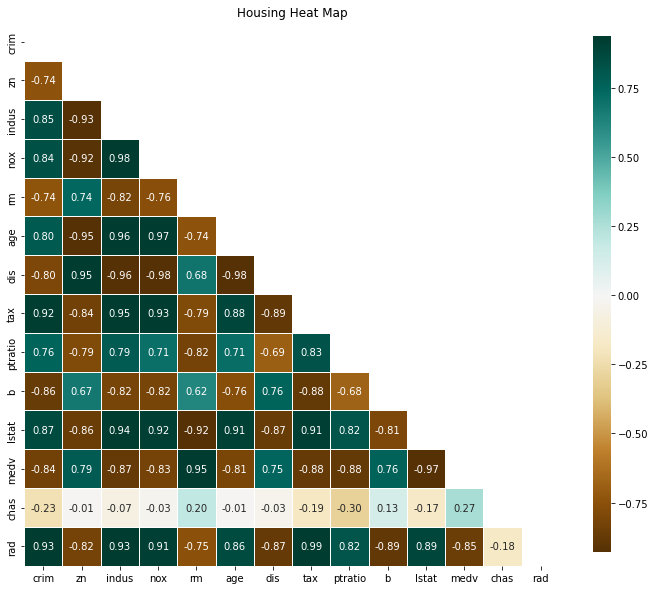

In [74]:
heatmap_fields = numerical_features.copy()
heatmap_fields.append(charles_river_field)
heatmap_fields.append(radial_field)

numerical_correlation_matrix = housing_df[heatmap_fields].corr()

get_plot_figure(15, 15)

klib.corr_plot(numerical_correlation_matrix).set_title('Housing Heat Map')
plt.show()

## Data Preprocessing

In [75]:
preprocessed_df = housing_df.copy()

### Feature Selection

Melakukan drop pada field chas (batas sungai), karena ia tidak memiliki korelasi dengan field apapun (heatmap). Terlebih lagi, pada grafik pie chart, sekitar 90% data didimonasi oleh angka 0 (tidak melewati sungai). Maka dari itu, ia tidak menunjukkan pattern apapun.

Dari penjelasan di atas, kita dapat menghapus field tersebut.

In [76]:
preprocessed_df.drop([charles_river_field], axis = 1, inplace=True)

### Hapus Outlier

#### Metode IQR

Melihat range interkuartil seluruh field dengan dataset yang ada.

Rumus dari IQR = Kuartil 3 - Kuartil 1

In [80]:
quartile_1 = preprocessed_df.quantile(0.25)
quartile_3 = preprocessed_df.quantile(0.75)

IQR = quartile_3 - quartile_1

print(IQR)

crim         3.595038
zn          12.500000
indus       12.910000
nox          0.175000
rm           0.738000
age         49.050000
dis          3.088250
rad         20.000000
tax        387.000000
ptratio      2.800000
b           20.847500
lstat       10.005000
medv         7.975000
dtype: float64


Menghapus Data Outlier

In [81]:
iqr_housing_df = preprocessed_df[~((preprocessed_df < (quartile_1 - 1.5 * IQR)) | (preprocessed_df > (quartile_3 + 1.5 * IQR))).any(axis=1)]

Melihat jumlah data yang tidak outlier

In [82]:
iqr_housing_df.shape[0]

288

### Splitting

### Scaling Method

## Modelling